In [1]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# データのインポート
df = pd.read_csv('deep_5m.csv')
df.set_axis(df['Datatime'], inplace=True)
display(df)

,Unnamed: 0,Datatime,Price
Datatime,,,
2022/1/24 9:00,0,2022/1/24 9:00,298.11
2022/1/24 9:05,1,2022/1/24 9:05,298.50
2022/1/24 9:10,2,2022/1/24 9:10,297.79
2022/1/24 9:15,3,2022/1/24 9:15,297.48
2022/1/24 9:20,4,2022/1/24 9:20,297.30
...,...,...,...
2022/3/22 23:35,7457,2022/3/22 23:35,303.75
2022/3/22 23:40,7458,2022/3/22 23:40,303.86
2022/3/22 23:45,7459,2022/3/22 23:45,303.93


In [3]:
def getTEvents(gRaw, h):
    '''
    本書のサンプルコード
    '''
    tEvents, sPos, sNeg = [], 0, 0
    diff = gRaw.diff()
    for i in diff.index[1:]:
        sPos, sNeg = max(0, sPos + diff.loc[i]), min(0, sNeg + diff.loc[i])
        if sNeg < -h:
            sNeg = 0
            tEvents.append(i)
        elif sPos > h:
            sPos = 0
            tEvents.append(i)
    
    return tEvents

In [4]:
price_daily = df.copy()

In [5]:
price_daily['PrevPrice'] = price_daily['Price'].shift(1)
price_daily['R'] = (price_daily['Price'] - price_daily['PrevPrice']) / price_daily['PrevPrice']
price_daily = price_daily.dropna()
price_daily.head()

,Unnamed: 0,Datatime,Price,PrevPrice,R
Datatime,,,,,
2022/1/24 9:05,1,2022/1/24 9:05,298.50,298.11,0.001308
2022/1/24 9:10,2,2022/1/24 9:10,297.79,298.50,-0.002379
2022/1/24 9:15,3,2022/1/24 9:15,297.48,297.79,-0.001041
2022/1/24 9:20,4,2022/1/24 9:20,297.30,297.48,-0.000605
2022/1/24 9:25,5,2022/1/24 9:25,297.70,297.30,0.001345


903


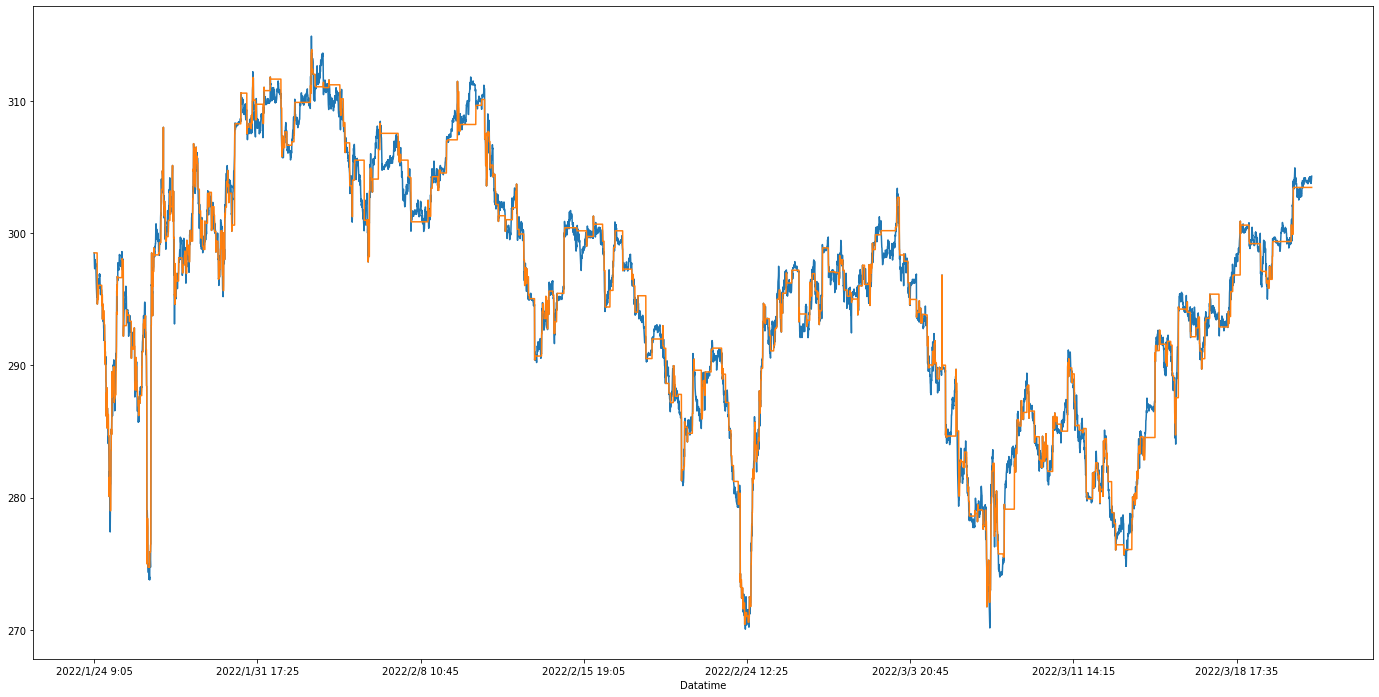

In [6]:
# CUSUMフィルタの実行
h = 0.005
t_events = getTEvents(price_daily['R'], h)
print(len(t_events))

# サンプリングされた日付のPriceを取得
events_val = []
val = 298.50
for i in range(len(price_daily)):
    if price_daily.index[i] in t_events:
        target = price_daily.iloc[i]
        val = target['Price']
    events_val.append(val)

# 原系列のPriceとサンプリングの結果をプロット
plt.figure(figsize=(24, 12))
price_daily['Price'].plot()
plt.plot(events_val)

In [7]:
# ヒストグラム描画のための値を取得
events_val_for_hist = []
events_val_for_hist.append(298.50)
for i in range(len(price_daily)):
    if price_daily.index[i] in t_events:
        target = price_daily.iloc[i]
        events_val_for_hist.append(target['Price'])

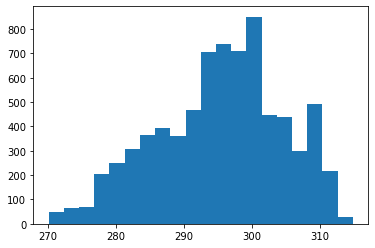

In [8]:
# サンプリング前のヒストグラム
plt.hist(price_daily['Price'], bins=20)
plt.show()

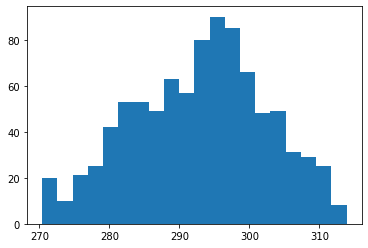

In [9]:
# サンプリング後のヒストグラム
plt.hist(events_val_for_hist, bins=20)
plt.show()

In [10]:
# シャピロ・ウィルク検定(S-W検定)

# サンプリング前
print(stats.shapiro(price_daily['Price']))
# サンプリング後
print(stats.shapiro(events_val_for_hist))

ShapiroResult(statistic=0.9813779592514038, pvalue=3.6524415039371336e-30)
ShapiroResult(statistic=0.9884063005447388, pvalue=1.435280182704446e-06)


C:\Users\msmn\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [11]:
# コルモゴロフ・スミルノフ検定(K-S検定)

# サンプリング前
print(stats.kstest(price_daily['Price'], "norm"))
# サンプリング後
print(stats.kstest(events_val_for_hist, "norm"))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


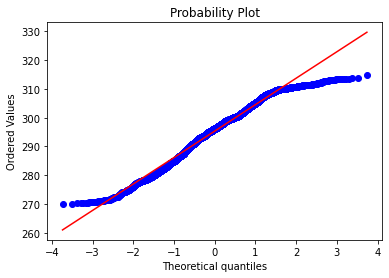

In [12]:
# Q-Qプロット

# サンプリング前
stats.probplot(price_daily['Price'], dist="norm", plot=plt)
plt.show()

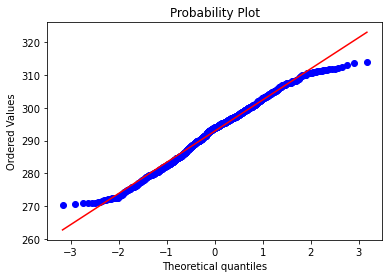

In [13]:
# Q-Qプロット

# サンプリング後
stats.probplot(events_val_for_hist, dist="norm", plot=plt)
plt.show()